## **1. Data Preprocessing**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# import dataset
data = pd.read_csv('hotel_bookings_data.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
# get brief information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# unique values and n unique values
data_info = {'values': [data[col].unique() for col in data.columns], 
             'nunique' : [data[col].nunique() for col in data.columns],
             'data type' : [data[col].dtype for col in data.columns]}
data_info = pd.DataFrame(data_info, index=data.columns)
data_info

,values,nunique,data type
hotel,"[Resort Hotel, City Hotel]",2,object
is_canceled,"[0, 1]",2,int64
lead_time,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...",479,int64
arrival_date_year,"[2017, 2018, 2019]",3,int64
arrival_date_month,"[September, October, November, December, Janua...",12,object
arrival_date_week_number,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...",53,int64
arrival_date_day_of_month,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",31,int64
stays_in_weekend_nights,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...",17,int64
stays_in_weekdays_nights,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...",35,int64
adults,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]",14,int64


In [5]:
# is there any nan values ?
nan_total = data.isnull().sum()
nan_pct = round(nan_total/data.shape[0] * 100,2)
data_nan = pd.DataFrame(data={'total':nan_total,
                              'pct_total': nan_pct}).sort_values(by='pct_total', ascending=False)
data_nan[data_nan['pct_total'] > 0]

,total,pct_total
company,112593,94.31
agent,16340,13.69
city,488,0.41


In [6]:
# is there any duplicates ?
dpc_rows = len(data[data.duplicated()])
dpc_pct = round(dpc_rows/data.shape[0] * 100,2)
print(f'Total Duplicates {dpc_rows} rows, or {dpc_pct}% of data')

Total Duplicates 33261 rows, or 27.86% of data


In [7]:
# is there any invalid values including as nan values or blank space
invalid_values = ['nan', 'na', 'n/a', 'null', 
                  'NAN', 'NA', 'N/A', 'NULL',
                  'Nan', 'Na', 'Null',
                  ' ','-','--']
checking_invalid = {'any invalid' : [], 'value' : []}

for col in data.columns:
    if any(value in invalid_values for value in data[col].unique()):
        checking_invalid['any invalid'].append('yes')
        checking_invalid['value'].append([value for value in data[col].unique() if value.lower() in invalid_values])
    else:
        checking_invalid['any invalid'].append('no')
        checking_invalid['value'].append([])

checking_invalid = pd.DataFrame(checking_invalid, index=data.columns)
checking_invalid

,any invalid,value
hotel,no,[]
is_canceled,no,[]
lead_time,no,[]
arrival_date_year,no,[]
arrival_date_month,no,[]
arrival_date_week_number,no,[]
arrival_date_day_of_month,no,[]
stays_in_weekend_nights,no,[]
stays_in_weekdays_nights,no,[]
adults,no,[]


In [8]:
# drop columns of company (missing values > 50%)
data.drop('company', axis=1, inplace=True)

In [9]:
# fill missing values in agent with mean
data['agent'].fillna(data['agent'].mean(), inplace=True)

In [10]:
# fill missing values in city with ffill
data['city'].ffill(inplace=True)

In [11]:
datetime_cols = ['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number','arrival_date_day_of_month']
data[datetime_cols]

,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month
0,2017,September,27,1
1,2017,September,27,1
2,2017,September,27,1
3,2017,September,27,1
4,2017,September,27,1
...,...,...,...,...
119385,2019,October,35,30
119386,2019,October,35,31
119387,2019,October,35,31
119388,2019,October,35,31


In [12]:
from datetime import datetime

# convert month name into month number
data['arrival_date_month'].apply(lambda x: datetime.strptime(x, '%B').month)

0          9
1          9
2          9
3          9
4          9
          ..
119385    10
119386    10
119387    10
119388    10
119389    10
Name: arrival_date_month, Length: 119390, dtype: int64

In [13]:
data['arrival_date'] = data['arrival_date_year'].astype('str') + \
    '-' + \
    data['arrival_date_month'].apply(lambda x: datetime.strptime(x, '%B').month).astype(str) + \
    '-' + \
    data['arrival_date_day_of_month'].astype('str')
data['arrival_date']

0           2017-9-1
1           2017-9-1
2           2017-9-1
3           2017-9-1
4           2017-9-1
             ...    
119385    2019-10-30
119386    2019-10-31
119387    2019-10-31
119388    2019-10-31
119389    2019-10-29
Name: arrival_date, Length: 119390, dtype: object

In [14]:
# convert to datetime object
try:
    pd.to_datetime(data['arrival_date'])
except Exception as e:
    print("Error occurred:", e)

Error occurred: day is out of range for month: 2017-9-31 present at position 30


In [15]:
# print out the data that have error day of range in september
out_of_range_datetime = data[(data['arrival_date_month'] == 'September') & (data['arrival_date_day_of_month'] > 30)]
len(out_of_range_datetime)

365

In [16]:
# drop error date out of range based on index, september
data = data.drop(index=out_of_range_datetime.index.tolist()).reset_index(drop=True)
data.shape

(119025, 29)

In [17]:
# convert to datetime object (run again, if theres any out of range in date)
try:
    pd.to_datetime(data['arrival_date'])
except Exception as e:
    print("Error occurred:", e)

Error occurred: day is out of range for month: 2017-2-29 present at position 177


In [18]:
# print out the data that have error day of range in february
out_of_range_datetime = data[(data['arrival_date_month'] == 'February') & (data['arrival_date_day_of_month'] > 28)]
len(out_of_range_datetime)

993

In [19]:
# drop error date out of range based on index, february
data = data.drop(index=out_of_range_datetime.index.tolist()).reset_index(drop=True)
data.shape

(118032, 29)

In [20]:
# convert to datetime object (run again, if theres any out of range in date)
try:
    pd.to_datetime(data['arrival_date'])
except Exception as e:
    print("Error occurred:", e)

In [21]:
# create new feature named arrival_date
data['arrival_date'] = pd.to_datetime(data['arrival_date'])
data['arrival_date']

0        2017-09-01
1        2017-09-01
2        2017-09-01
3        2017-09-01
4        2017-09-01
            ...    
118027   2019-10-30
118028   2019-10-31
118029   2019-10-31
118030   2019-10-31
118031   2019-10-29
Name: arrival_date, Length: 118032, dtype: datetime64[ns]

In [22]:
# reassign new value to the right value based on arrival_date
data['arrival_date_week_number'] = data['arrival_date'].dt.isocalendar().week
data['arrival_date_week_number']

0         35
1         35
2         35
3         35
4         35
          ..
118027    44
118028    44
118029    44
118030    44
118031    44
Name: arrival_date_week_number, Length: 118032, dtype: UInt32

In [23]:
# descriptive stats in numerical cols
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118032.0,0.370764,0.483011,0.0,0.0,0.0,1.0,1.0
lead_time,118032.0,103.9634,106.987205,0.0,18.0,69.0,160.0,737.0
arrival_date_year,118032.0,2018.16177,0.705978,2017.0,2018.0,2018.0,2019.0,2019.0
arrival_date_week_number,118032.0,29.576496,14.120231,1.0,19.0,31.0,41.0,52.0
arrival_date_day_of_month,118032.0,15.632761,8.693416,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,118032.0,0.929358,0.999729,0.0,0.0,1.0,2.0,19.0
stays_in_weekdays_nights,118032.0,2.496484,1.912327,0.0,1.0,2.0,3.0,50.0
adults,118032.0,1.85509,0.580875,0.0,2.0,2.0,2.0,55.0
children,118028.0,0.103289,0.397679,0.0,0.0,0.0,0.0,10.0
babies,118032.0,0.007837,0.096878,0.0,0.0,0.0,0.0,10.0


In [24]:
# descriptive stats in object cols
data.describe(include='object').T

,count,unique,top,freq
hotel,118032,2,City Hotel,78537
arrival_date_month,118032,12,October,13877
meal,118032,5,Breakfast,91301
city,118032,177,Kota Denpasar,48313
market_segment,118032,8,Online TA,55848
distribution_channel,118032,5,TA/TO,96809
deposit_type,118032,3,No Deposit,103364
customer_type,118032,4,Personal,88614
reservation_status,118032,3,Check-Out,74270


In [25]:
# descriptive stats in datetime cols
data['arrival_date'].describe(datetime_is_numeric=True).T

count                           118032
mean     2018-09-20 05:48:31.183407872
min                2017-01-01 00:00:00
25%                2018-03-03 00:00:00
50%                2018-09-18 00:00:00
75%                2019-05-20 00:00:00
max                2019-10-31 00:00:00
Name: arrival_date, dtype: object

In [26]:
def function_dist(df, cols, hue=None, num_bins=10):
    # reference: https://matplotlib.org/stable/gallery/statistics/histogram_features.html#sphx-glr-gallery-statistics-histogram-features-py

    if len(cols) <= 6:
        c, r = 3, 2
    elif len(cols) <= 12:
        c, r = 6, 2
    elif len(cols) <= 18:
        c, r = 6, 3
    elif len(cols) <= 24:
        c, r = 6, 4
    elif len(cols) <= 30:
        c, r = 6, 5
    
    figsize = (4*c, 3*r)
    plt.figure(figsize=figsize)
    sns.set_palette('Set2')
    
    for i, col in enumerate(cols):
        mu = np.mean(df[col])  # mean of distribution
        sigma = np.std(df[col])  # standard deviation of distribution

        plt.subplot(r, c, i+1)
        
        # Histogram of the data
        if hue:
            for value in df[hue].unique():
                subset = df[df[hue] == value]
                n, bins, patches = plt.hist(subset[col], bins=num_bins, density=True, alpha=0.85, label=value)
            plt.legend()
        else:
            n, bins, patches = plt.hist(df[col], bins=num_bins, density=True)

        # Add a 'best fit' line
        y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
            np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
        plt.plot(bins, y, '--', color='grey')
        plt.xlabel('Value')
        plt.ylabel('Probability density')
        plt.title(f'{col}\n$\mu={mu:.0f}$, $\sigma={sigma:.0f}$')

    # Tweak spacing to prevent clipping of ylabel
    plt.tight_layout()
    plt.show()

In [27]:
# cols to see the distribution
dist_cols = ['adr', 'agent', 'stays_in_weekdays_nights', 'booking_changes', 'lead_time', 'total_of_special_requests', 'required_car_parking_spaces',
              'arrival_date_year', 'days_in_waiting_list', 'previous_bookings_not_canceled', 'adults', 'previous_cancellations', 'is_repeated_guest',
               'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'babies']

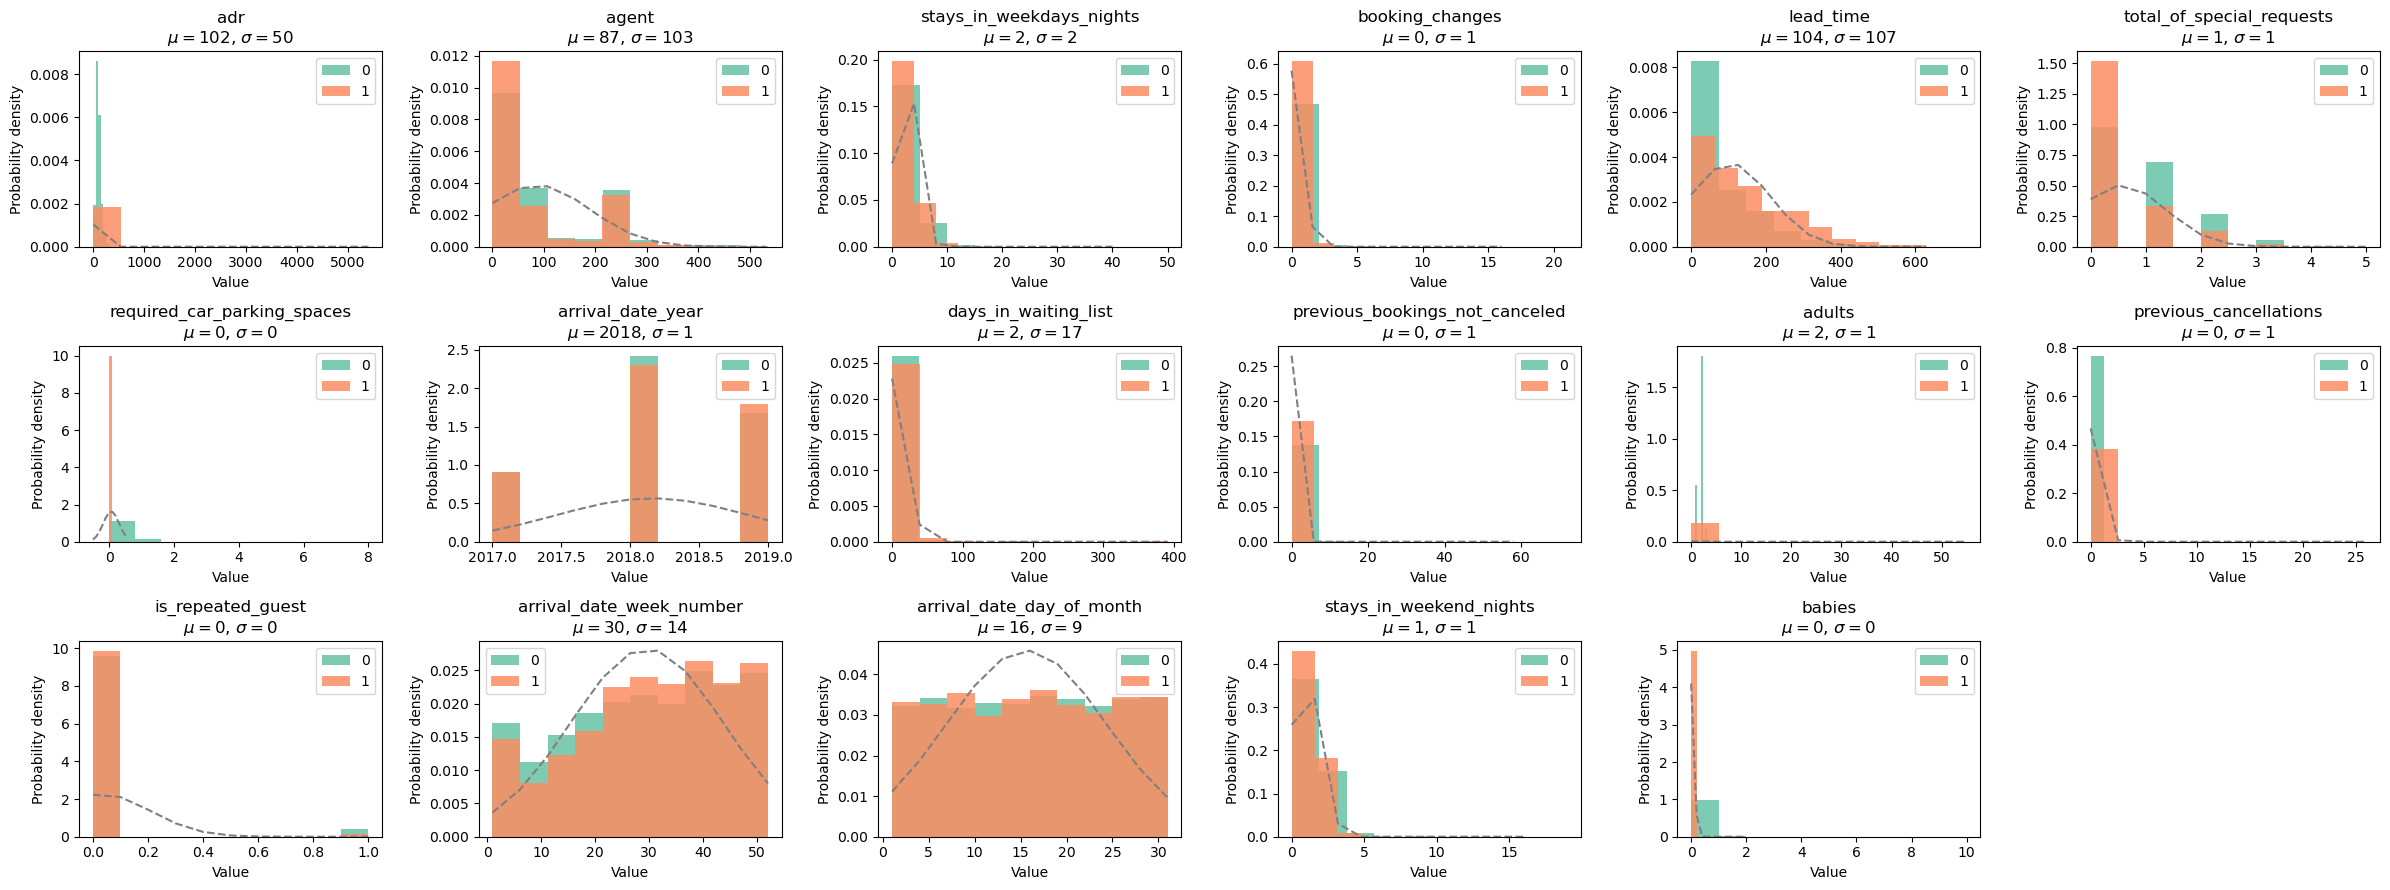

In [28]:
# compare distribution by cancelation status
function_dist(data, dist_cols, hue='is_canceled', num_bins=10)

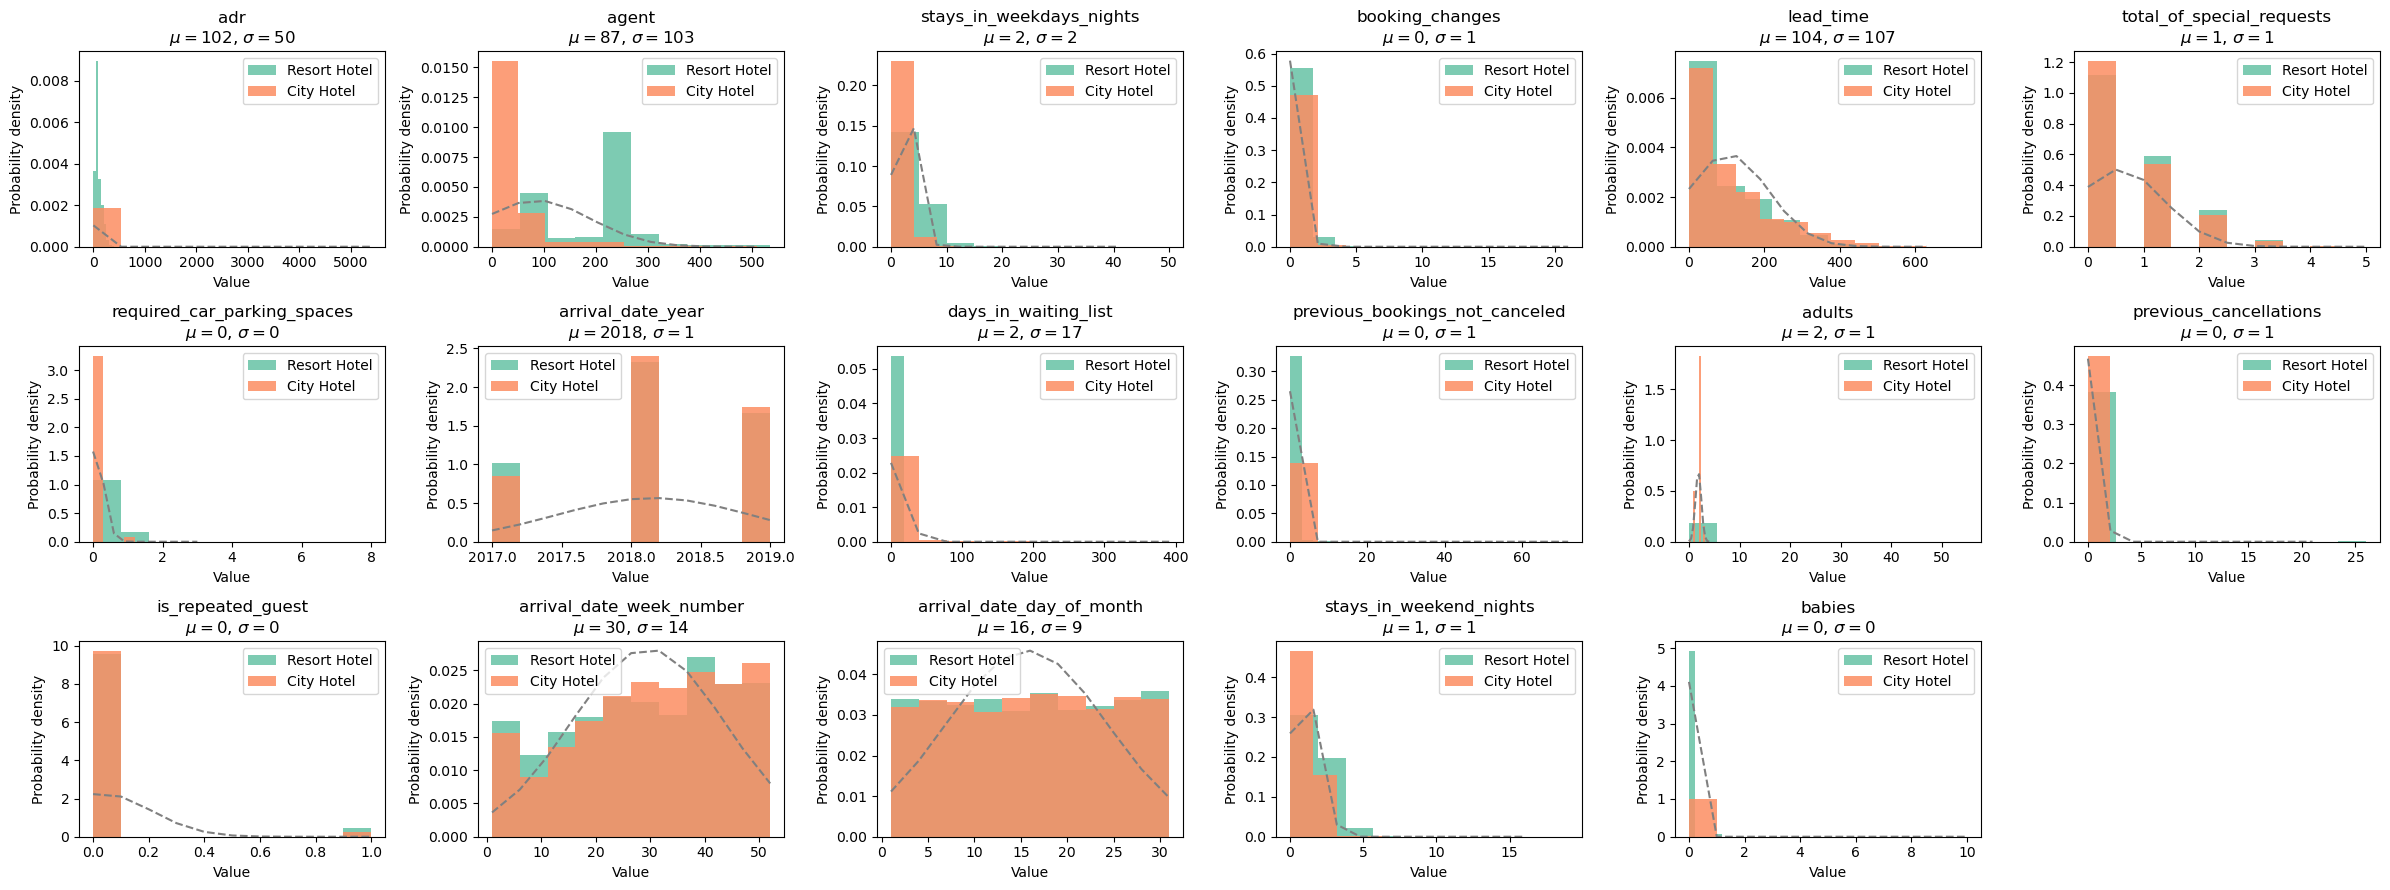

In [29]:
# compare distribution by type of hotel
function_dist(data, dist_cols, hue='hotel', num_bins=10)

In [30]:
# backup/export to csv
data_preprocessing = data.copy()
data_preprocessing.to_csv('data_preprocessing.csv', index=False)

In [31]:
data_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118032 entries, 0 to 118031
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118032 non-null  object        
 1   is_canceled                     118032 non-null  int64         
 2   lead_time                       118032 non-null  int64         
 3   arrival_date_year               118032 non-null  int64         
 4   arrival_date_month              118032 non-null  object        
 5   arrival_date_week_number        118032 non-null  UInt32        
 6   arrival_date_day_of_month       118032 non-null  int64         
 7   stays_in_weekend_nights         118032 non-null  int64         
 8   stays_in_weekdays_nights        118032 non-null  int64         
 9   adults                          118032 non-null  int64         
 10  children                        118028 non-null  float64

## **2. Monthly Hotel Booking Analysis Based On Hotel Type**

### **Statistical Analysis by Hotel Type**

In [32]:
numeric_cols = [col for col in data.columns if (data[col].dtype in ('int64', 'float64')) and (col != 'arrival_date_year')]

In [33]:
# references 
    # - https://medium.com/@syncwithdanish/bring-colors-to-your-data-frames-cfb7707259a6 | color style in dataframe
    # - https://medium.com/@danielwume/elevate-your-python-data-visualization-skills-a-deep-dive-into-advanced-plotly-techniques-with-cff8bf2fcd06 | plotly tutorial
    # - https://matplotlib.org/stable/users/explain/colors/colormaps.html | colormaps
    # - https://www.altexsoft.com/blog/revpar-occupancy-rate-adr-hotel-metrics/ | hotel business metrics

avg_insight = data.groupby('hotel')[numeric_cols].mean().T
avg_insight['Diff % (City-Resort)'] = round(((avg_insight['City Hotel'] - avg_insight['Resort Hotel'])/avg_insight['City Hotel']) * 100,2)
avg_insight.columns = ['city hotel (avg)','resort hotel (avg)','pct diff (avg)']
avg_insight.style.background_gradient(subset=["pct diff (avg)"],
                                      cmap='RdYlGn',
                                      vmin=-100, vmax=100)

,city hotel (avg),resort hotel (avg),pct diff (avg)
is_canceled,0.417396,0.278035,33.390000
lead_time,109.679807,92.596151,15.580000
arrival_date_day_of_month,15.642423,15.613546,0.180000
stays_in_weekend_nights,0.794976,1.196582,-50.520000
stays_in_weekdays_nights,2.176363,3.133055,-43.960000
adults,1.849561,1.866084,-0.890000
children,0.090854,0.128016,-40.900000
babies,0.004851,0.013774,-183.930000
is_repeated_guest,0.025746,0.044284,-72.000000
previous_cancellations,0.080001,0.103026,-28.780000


**Insight:**

1. Rata-rata jumlah cancel City Hotel 33% lebih besar dari Resort Hotel
2. Resort Hotel 15% lebih cepat dalam menangani Bookings dibandingkan City Hotel
3. Baik City Hotel dan Resort Hotel, banyak dipesan pada tanggal 15 atau minggu kedua setiap bulannya.
4. Baik weekday atau weekend, jumlah malam yang dipesan pada Resort Hotel lebih tinggi dari City Hotel.
5. Pemesan dari Resort Hotel di berbagai usia seperti Dewasa, Anak, dan Bayi sedikit lebih banyak dari pemesan di City Hotel.
6. Mayoritas pemesan Resort Hotel dan City Hotel bukanlah Tamu yang pernah menginap sebelumnya. (2/100 City Hotel, 4/100 Resort Hotel).
7. Mayoritas pemesan City Hotel dan Resort Hotel tidak pernah melakukan pembatalan pemesanan. (<1)
8. Mayoritas pemesan City Hotel dan Resort Hotel tidak melakukan pembatalan pada pemesanan terakhir (<1)
9. Mayoritas pemesan City Hotel dan Resort Hotel tidak pernah melakukan perubahan pemesanan. (<1)
10. Rata-rata fee agent untuk City Hotel sebesar 34, sedangkan Resort Hotel 190 atau 6x lebih besar dari City Hotel.
11. Rata-rata Waiting list pada pemesanan City Hotel adalah 3 hari, sedangkan Resort Hotel adalah 0 hari.
12. ADR (Average Daily Rate), City Hotel lebih besar dari Resort Hotel.
13. Mayoritas pemesan City Hotel dan Resort Hotel tidak membutuhkan ruang parkir (<1).
14. 50-60% dari pemesan City Hotel dan Resort Hotel melakukan permintaan khusus.

### **Annual Number of Bookings by Hotel Type**

<Figure size 1200x400 with 0 Axes>

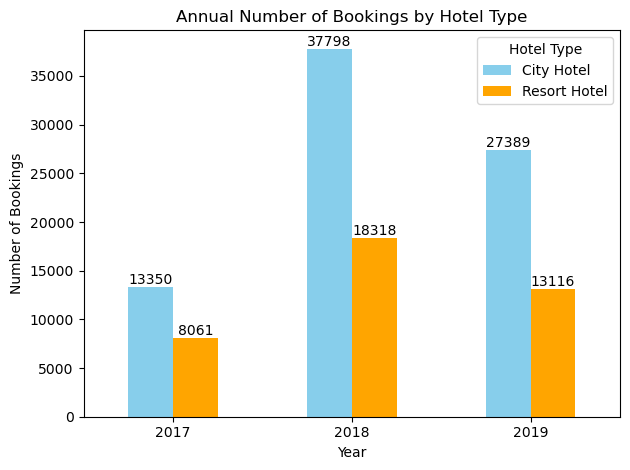

In [34]:
# annual number of bookings by hotel type
annual_guest = data.groupby('arrival_date_year')['hotel'].value_counts(normalize=False)

# barplot to visualize difference in eacy year
plt.figure(figsize=(12,4))
ax = annual_guest.unstack().plot.bar(color=['skyblue', 'orange'])
plt.title('Annual Number of Bookings by Hotel Type')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.legend(title='Hotel Type')
plt.xticks(rotation=0)

for p in ax.patches:
    plt.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                 xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

**Insight:**

Jumlah pemesanan pada City Hotel selalu lebih tinggi dari Resort Hotel dari tahun ke tahun. Baik City Hotel dan Resort Hotel mengalami peningkatan jumlah bookings pada tahun 2018 namun mengalami penurunan di tahun berikutnya (2019). Untuk mengetahui penyebab atau faktor apa saja yang menyebabkan hal tersebut, akan dilakukan analisa lebih lanjut pada tingkat perbulan (Monthly).

### **Annual Average ADR by Hotel Type**

<Figure size 1200x400 with 0 Axes>

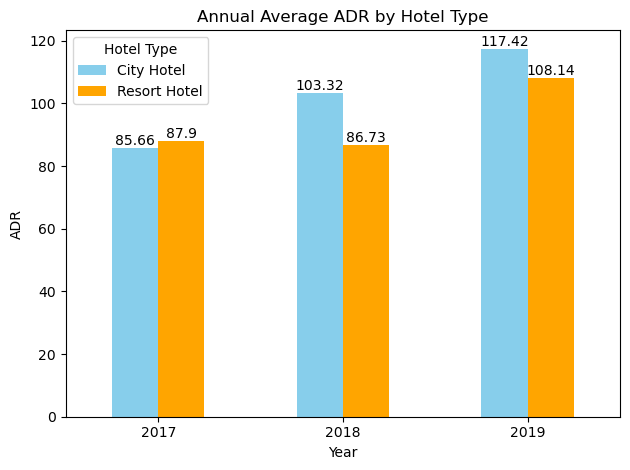

In [35]:
# annual average adr by hotel type
annual_adr = data.groupby(['arrival_date_year','hotel'])['adr'].mean().round(2)

# barplot to visualize difference in eacy year
plt.figure(figsize=(12,4))
ax = annual_adr.unstack().plot.bar(color=['skyblue', 'orange'])
plt.title('Annual Average ADR by Hotel Type')
plt.xlabel('Year')
plt.ylabel('ADR')
plt.legend(title='Hotel Type')
plt.xticks(rotation=0)

for p in ax.patches:
    plt.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                 xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

**Insight:**

ADR digunakan untuk menghitung pendapatan sewa rata-rata per kamar yang ditempati pada waktu tertentu. ADR didapatkan dari total pendapatan (revenue) dibagi dengan jumlah kamar yang terjual. Annual ADR pada City Hotel selalu mengalami kenaikan di setiap tahunnya, sedangkan Resort Hotel terjadi sedikit penurunan di tahun 2018 dan kembali peningkatan di tahun berikutnya (2019). Untuk melihat lebih jelas faktor apa yang menjadi kenaikan/penurunan ini, akan dilakukan analisa pada tingkat perbulan (monthly).

### **Annual Cancel Rate and Total Cancel by Hotel Type**

In [36]:
# get ratio of cancelation based hotel type
annual_cancel = data.groupby(['arrival_date_year','hotel'])['is_canceled'].value_counts().round(2)
annual_cancel_ratio = data.groupby(['arrival_date_year','hotel'])['is_canceled'].value_counts(normalize=True).round(2)

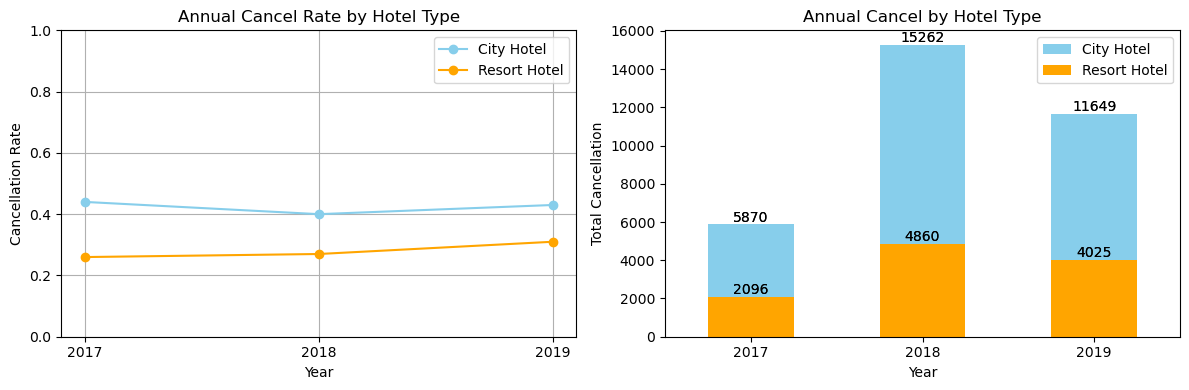

In [37]:
# compare annual cancelation by hotel type
year_label = [2017,2018,2019]
city_hotel_cancel_rate = annual_cancel_ratio.xs(('City Hotel', 1), level=['hotel', 'is_canceled'])
resort_hotel_cancel_rate = annual_cancel_ratio.xs(('Resort Hotel', 1), level=['hotel', 'is_canceled'])
city_hotel_cancel = annual_cancel.xs(('City Hotel', 1), level=['hotel', 'is_canceled'])
resort_hotel_cancel = annual_cancel.xs(('Resort Hotel', 1), level=['hotel', 'is_canceled'])

plt.figure(figsize=(12,4))

# lineplot to visualize ratio cancellation
plt.subplot(1,2,1)
city_hotel_cancel_rate.plot(kind='line', marker='o', color='skyblue', label='City Hotel')
resort_hotel_cancel_rate.plot(kind='line', marker='o', color='orange', label='Resort Hotel')
plt.title('Annual Cancel Rate by Hotel Type')
plt.xticks(year_label)
plt.xlabel('Year')
plt.ylabel('Cancellation Rate')
plt.legend()
plt.ylim(0, 1)
plt.grid(True)

# barplot to visualize total cancel
plt.subplot(1, 2, 2)
city_hotel_cancel_plot = city_hotel_cancel.plot(kind='bar', label='City Hotel', color='skyblue')
resort_hotel_cancel_plot = resort_hotel_cancel.plot(kind='bar', label='Resort Hotel', color='orange')

for p in city_hotel_cancel_plot.patches:
    plt.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                 xytext=(0, 5), textcoords='offset points')

for p in resort_hotel_cancel_plot.patches:
    plt.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                 xytext=(0, 5), textcoords='offset points')

plt.title('Annual Cancel by Hotel Type')
plt.xlabel('Year')
plt.ylabel('Total Cancellation')
plt.xticks(rotation=0)
plt.legend()

plt.tight_layout()
plt.show()

**Insight:**

Jumlah tamu yang melakukan pembatalan mengalami kenaikan lebih dari 100% dari tahun 2017 ke 2018. Hal ini menunjukkan adanya peningkatan signifikan dalam jumlah pembatalan.
Meskipun demikian, tingkat pembatalan (cancel rate) justru menurun. Ini mungkin disebabkan oleh peningkatan jumlah total pemesanan yang lebih besar dari peningkatan jumlah pembatalan. Dengan kata lain, peningkatan jumlah tamu yang memesan kamar mungkin lebih signifikan daripada peningkatan jumlah pembatalan, sehingga cancel rate secara relatif menurun.

Jumlah pembatalan menurun dari tahun 2017 ke 2018. Hal ini menunjukkan bahwa hotel berhasil mengurangi jumlah pembatalan dari tahun ke tahun.
Meskipun jumlah pembatalan menurun, tingkat pembatalan (cancel rate) meningkat. Hal ini bisa terjadi jika penurunan jumlah pembatalan tidak sebanding dengan peningkatan jumlah total pemesanan. Dengan kata lain, peningkatan jumlah tamu yang memesan kamar mungkin tidak cukup besar untuk mengimbangi penurunan jumlah pembatalan, sehingga cancel rate meningkat secara relatif.

Kesimpulannya, meskipun jumlah pembatalan dapat meningkat atau menurun dari tahun ke tahun, cancel rate (persentase pembatalan dari total pemesanan) akan dipengaruhi oleh perubahan dalam jumlah total pemesanan. Hal ini menunjukkan pentingnya melihat secara holistik tidak hanya jumlah pembatalan tetapi juga total pemesanan untuk mendapatkan pemahaman yang lebih lengkap tentang tingkat pembatalan sebenarnya.

In [38]:
def monthly_analysis(data, date_col, col=None, aggfunc=None, figsize=(12,5)):
    fig, ax = plt.subplots(figsize=(12,5))
    
    if aggfunc == None:

        monthly_counts_city = data[data['hotel'] == 'City Hotel'].resample(
            'M', on='arrival_date').size()
        ax.plot(monthly_counts_city.index, monthly_counts_city.values,
        marker='o', ls='-', label='City Hotel', color='skyblue')

        monthly_counts_resort = data[data['hotel'] == 'Resort Hotel'].resample(
            'M', on='arrival_date').size()
        ax.plot(monthly_counts_resort.index, monthly_counts_resort.values,
        marker='o', ls='-', label='Resort Hotel', color='orange')
    
    elif aggfunc == 'mean':
        
        monthly_counts_city = data[data['hotel'] == 'City Hotel'].resample(
            'M', on='arrival_date')[col].mean().fillna(0).round(2)
        ax.plot(monthly_counts_city.index, monthly_counts_city.values,
        marker='o', ls='-', label='City Hotel', color='skyblue')

        monthly_counts_resort = data[data['hotel'] == 'Resort Hotel'].resample(
            'M', on='arrival_date')[col].mean().fillna(0).round(2)
        ax.plot(monthly_counts_resort.index, monthly_counts_resort.values,
        marker='o', ls='-', label='Resort Hotel', color='orange')
    
    elif aggfunc == 'median':
        
        monthly_counts_city = data[data['hotel'] == 'City Hotel'].resample(
            'M', on='arrival_date')[col].median().fillna(0).round(2)
        ax.plot(monthly_counts_city.index, monthly_counts_city.values,
        marker='o', ls='-', label='City Hotel', color='skyblue')

        monthly_counts_resort = data[data['hotel'] == 'Resort Hotel'].resample(
            'M', on='arrival_date')[col].median().fillna(0).round(2)
        ax.plot(monthly_counts_resort.index, monthly_counts_resort.values,
        marker='o', ls='-', label='Resort Hotel', color='orange')


    # mean based on type of hotel
    avg_city = monthly_counts_city.mean().round(2)
    avg_resort = monthly_counts_resort.mean().round(2)

     # add reference line (avg)
    ax.axhline(avg_city, color='skyblue', linestyle='--', label=f'Avg City Hotel: {avg_city}')
    ax.fill_between(monthly_counts_city.index, monthly_counts_city.values, avg_city, color='skyblue', alpha=0.3)
    ax.axhline(avg_resort, color='orange', linestyle='--', label=f'Avg Resort Hotel: {avg_resort}')
    ax.fill_between(monthly_counts_resort.index, monthly_counts_resort.values, avg_resort, color='orange', alpha=0.3)

    # title set value
    title = ''
    
    if col is None:
        title = 'Hotel Booking'
    else:
        title = col

    aggfunc_title = ''
    if aggfunc == 'mean':
        aggfunc_title = 'Average'
    elif aggfunc == 'median':
        aggfunc_title = 'Median'
    else:
        aggfunc_title = 'Total'

    # ylabel set value
    ylabel = ''

    if col is None:
        ylabel = 'Hotel Booking'
    else:
        ylabel = col
     
    
    ax.set_title(f'Monthly {aggfunc_title.title()} {title.title().replace("_", " ")}', fontsize=18, fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel(f'{aggfunc_title} {ylabel.title().replace("_"," ")}')

    plt.xticks(rotation=45, ha='right')

    monthly_index = pd.date_range(start='2017-01-01', end='2019-10-31', freq='M')
    monthly_counts_city = monthly_counts_city.reindex(monthly_index, fill_value=0)
    monthly_counts_resort = monthly_counts_resort.reindex(monthly_index, fill_value=0)

    monthly_year_labels = [date.strftime('%b-%Y') for date in monthly_index]

    ax.set_xticks(monthly_index)
    ax.set_xticklabels(monthly_year_labels)

    ax.legend()

    plt.tight_layout()
    plt.show()

### **Monthly Total Booking**

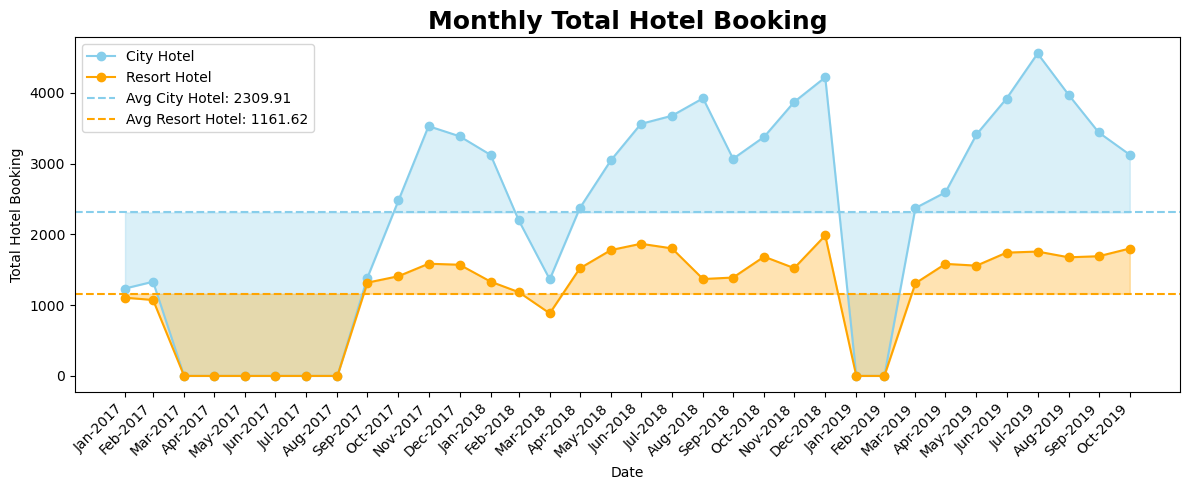

In [39]:
# total monthly guest
monthly_analysis(data, 'arrival_date', col=None, aggfunc=None, figsize=(12, 5))

**Insight:**

Grafik menunjukkan bahwa rata-rata pemesanan bulanan di City Hotel jauh lebih tinggi daripada di Resort Hotel, bahkan hingga dua kali lipat. Baik City Hotel maupun Resort Hotel mengalami peningkatan pemesanan selama April-Agustus dan Oktober-Desember.

Peningkatan ini sebagian besar disebabkan oleh musim liburan sekolah pada April-Agustus. Orang-orang cenderung berlibur ke berbagai destinasi wisata, baik di kota (City Hotel) maupun di alam (Resort Hotel), karena cuaca yang cerah memungkinkan aktivitas wisata yang lebih banyak.

Sementara itu, pada periode Oktober-Desember, banyak orang merayakan liburan akhir tahun dengan melakukan perjalanan baik ke kota (City Hotel) maupun ke alam (Resort Hotel). Kedua periode liburan ini memicu peningkatan pemesanan hotel secara signifikan.

In [40]:
# monthly guest
monthly_guest_city = data[data['hotel'] == 'City Hotel'].resample('M', on='arrival_date').size()
monthly_guest_resort = data[data['hotel'] == 'Resort Hotel'].resample('M', on='arrival_date').size()
total_guest = pd.concat([monthly_guest_city,monthly_guest_resort], axis=1)
total_guest.columns = ['monthly_guest_city', 'monthly_guest_resort']
total_guest.replace({0: np.NaN}, inplace=True)
total_guest.dropna(inplace=True)
total_guest['pctchange_monthly_guest_city'] = total_guest['monthly_guest_city'].pct_change().fillna(0).round(2) * 100
total_guest['pctchange_monthly_guest_resort'] = total_guest['monthly_guest_resort'].pct_change().fillna(0).round(2) * 100
total_guest

,monthly_guest_city,monthly_guest_resort,pctchange_monthly_guest_city,pctchange_monthly_guest_resort
arrival_date,,,,
2017-01-31,1235.0,1105.0,0.0,0.0
2017-02-28,1331.0,1073.0,8.0,-3.0
2017-09-30,1389.0,1318.0,4.0,23.0
2017-10-31,2480.0,1409.0,79.0,7.0
2017-11-30,3529.0,1585.0,42.0,12.0
2017-12-31,3386.0,1571.0,-4.0,-1.0
2018-01-31,3122.0,1332.0,-8.0,-15.0
2018-02-28,2199.0,1184.0,-30.0,-11.0
2018-03-31,1364.0,884.0,-38.0,-25.0


### **Monthly Average Total Nights**

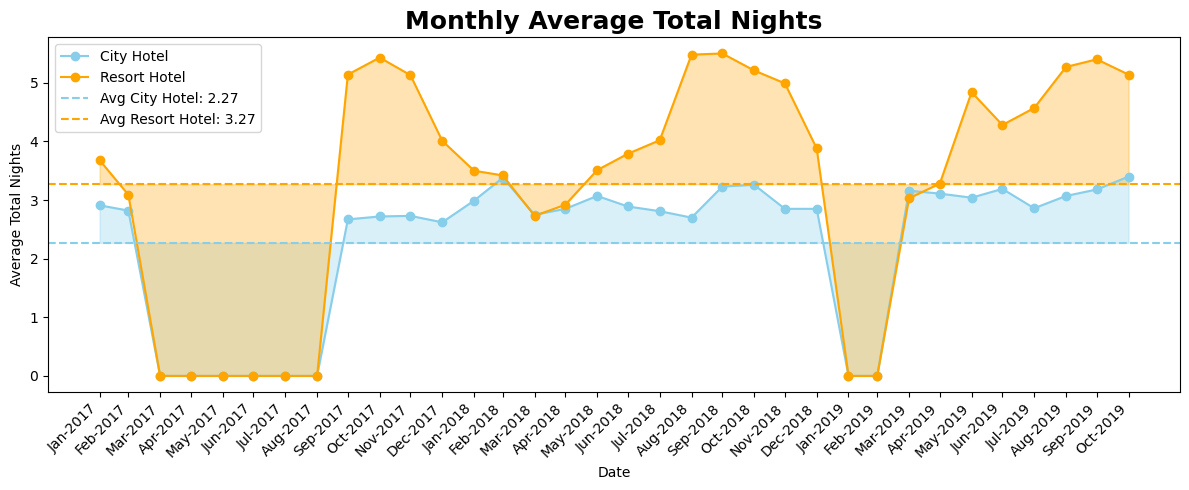

In [41]:
# average total nights monthly
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_weekdays_nights']
monthly_analysis(data, 'arrival_date', col='total_nights', aggfunc='mean', figsize=(12, 5))

**Insight:**

Grafik menunjukkan bahwa Resort Hotel memiliki rata-rata jumlah malam yang lebih tinggi setiap bulannya dibandingkan dengan City Hotel, mungkin karena Resort Hotel menawarkan pengalaman liburan yang lebih panjang dan santai, serta biasanya terletak di destinasi liburan alam yang menarik. 

Di Resort Hotel, terjadi tren kenaikan pada bulan Agustus, yang mungkin disebabkan oleh liburan musim panas dan tingginya permintaan akan akomodasi di destinasi wisata alam. Namun, tren penurunan dimulai pada bulan Oktober, yang bisa disebabkan oleh berakhirnya musim liburan musim panas dan beralihnya wisatawan ke destinasi lain atau kembali ke rutinitas mereka. Sementara itu, kestabilan rata-rata jumlah malam setiap bulannya di City Hotel, yang berkisar antara 2-3 malam dari Januari 2017 hingga Oktober 2019, mungkin disebabkan oleh sifat perjalanan yang lebih singkat atau tujuan kunjungan yang lebih bisnis daripada liburan yang berlama-lamaan.

In [42]:
# avg. monthly total nights
avg_monthly_nights_city = data[data['hotel'] == 'City Hotel'].resample('M', on='arrival_date')['total_nights'].mean().round(2).fillna(0)
avg_monthly_nights_resort = data[data['hotel'] == 'Resort Hotel'].resample('M', on='arrival_date')['total_nights'].mean().round(2).fillna(0)
avg_monthly_nights = pd.concat([avg_monthly_nights_city,avg_monthly_nights_resort], axis=1)
avg_monthly_nights.columns = ['avg_monthly_nights_city', 'avg_monthly_nights_resort']
avg_monthly_nights.replace({0: np.NaN}, inplace=True)
avg_monthly_nights.dropna(inplace=True)
avg_monthly_nights['pctchange_avg_monthly_nights_city'] = avg_monthly_nights['avg_monthly_nights_city'].pct_change().fillna(0).round(2) * 100
avg_monthly_nights['pctchange_avg_monthly_nights_resort'] = avg_monthly_nights['avg_monthly_nights_resort'].pct_change().fillna(0).round(2) * 100
avg_monthly_nights

,avg_monthly_nights_city,avg_monthly_nights_resort,pctchange_avg_monthly_nights_city,pctchange_avg_monthly_nights_resort
arrival_date,,,,
2017-01-31,2.91,3.68,0.0,0.0
2017-02-28,2.82,3.09,-3.0,-16.0
2017-09-30,2.67,5.14,-5.0,66.0
2017-10-31,2.72,5.43,2.0,6.0
2017-11-30,2.73,5.13,0.0,-6.0
2017-12-31,2.62,4.01,-4.0,-22.0
2018-01-31,2.99,3.50,14.0,-13.0
2018-02-28,3.38,3.42,13.0,-2.0
2018-03-31,2.75,2.73,-19.0,-20.0


### **Monthly Average ADR (Average Daily Rate)**

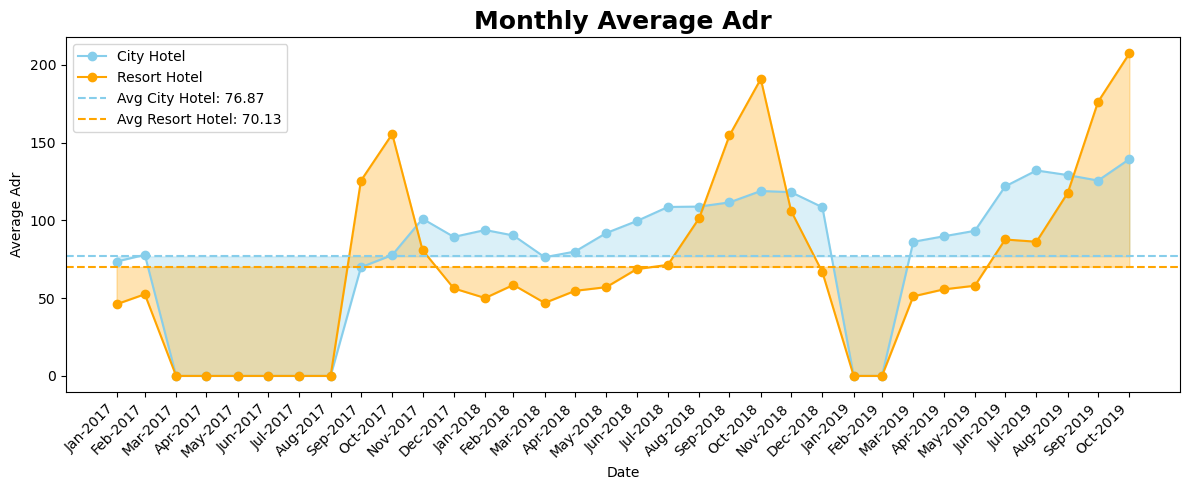

In [43]:
# average monthly adr
monthly_analysis(data, 'arrival_date', col='adr', aggfunc='mean', figsize=(12, 5))

**Insight:**

Grafik menunjukkan bahwa City Hotel memiliki rata-rata harga kamar (ADR) yang lebih tinggi setiap bulannya dibandingkan dengan Resort Hotel. Pada Resort Hotel, terjadi tren kenaikan secara bertahap dari bulan Maret hingga Oktober, dengan ADR naik dari 46.93 hingga 190.96 pada tahun 2018, dan dari 51.17 hingga 207.35 pada tahun 2019. Hal ini mungkin disebabkan oleh meningkatnya permintaan akomodasi selama musim liburan atau peningkatan popularitas resort sebagai destinasi liburan. Sementara itu, pada City Hotel, juga terjadi tren kenaikan dari bulan Maret hingga Oktober, dengan ADR meningkat dari 76.33 hingga 118.15 pada tahun 2018, dan dari 86.25 hingga 139.42 pada tahun 2019. Peningkatan ini mungkin mencerminkan peningkatan permintaan akomodasi di kota selama musim liburan atau karena faktor-faktor lain seperti acara khusus atau konferensi yang menarik banyak tamu.

In [44]:
# avg. monthly adr
avg_monthly_adr_city = data[data['hotel'] == 'City Hotel'].resample('M', on='arrival_date')['adr'].mean().round(2).fillna(0)
avg_monthly_adr_resort = data[data['hotel'] == 'Resort Hotel'].resample('M', on='arrival_date')['adr'].mean().round(2).fillna(0)
avg_monthly_adr = pd.concat([avg_monthly_adr_city,avg_monthly_adr_resort], axis=1)
avg_monthly_adr.columns = ['avg_monthly_adr_city', 'avg_monthly_adr_resort']
avg_monthly_adr.replace({0: np.NaN}, inplace=True)
avg_monthly_adr.dropna(inplace=True)
avg_monthly_adr['pctchange_avg_monthly_adr_city'] = avg_monthly_adr['avg_monthly_adr_city'].pct_change().fillna(0).round(2) * 100
avg_monthly_adr['pctchange_avg_monthly_adr_resort'] = avg_monthly_adr['avg_monthly_adr_resort'].pct_change().fillna(0).round(2) * 100
avg_monthly_adr

,avg_monthly_adr_city,avg_monthly_adr_resort,pctchange_avg_monthly_adr_city,pctchange_avg_monthly_adr_resort
arrival_date,,,,
2017-01-31,73.54,46.09,0.0,0.0
2017-02-28,77.86,52.53,6.0,14.0
2017-09-30,69.86,125.52,-10.0,139.0
2017-10-31,77.73,155.55,11.0,24.0
2017-11-30,101.06,80.91,30.0,-48.0
2017-12-31,89.39,56.27,-12.0,-30.0
2018-01-31,93.82,50.08,5.0,-11.0
2018-02-28,90.32,58.51,-4.0,17.0
2018-03-31,76.33,46.93,-15.0,-20.0


In [45]:
# all summary monthly analysis
monthly_analysis = pd.merge(total_guest, avg_monthly_nights, on='arrival_date').merge(avg_monthly_adr, on='arrival_date')
monthly_analysis = monthly_analysis[['monthly_guest_city', 'pctchange_monthly_guest_city',
                                     'avg_monthly_nights_city', 'pctchange_avg_monthly_nights_city',
                                     'avg_monthly_adr_city', 'pctchange_avg_monthly_adr_city',
                                     'monthly_guest_resort', 'pctchange_monthly_guest_resort',
                                     'avg_monthly_nights_resort', 'pctchange_avg_monthly_nights_resort',
                                     'avg_monthly_adr_resort', 'pctchange_avg_monthly_adr_resort']]
monthly_analysis

,monthly_guest_city,pctchange_monthly_guest_city,avg_monthly_nights_city,pctchange_avg_monthly_nights_city,avg_monthly_adr_city,pctchange_avg_monthly_adr_city,monthly_guest_resort,pctchange_monthly_guest_resort,avg_monthly_nights_resort,pctchange_avg_monthly_nights_resort,avg_monthly_adr_resort,pctchange_avg_monthly_adr_resort
arrival_date,,,,,,,,,,,,
2017-01-31,1235.0,0.0,2.91,0.0,73.54,0.0,1105.0,0.0,3.68,0.0,46.09,0.0
2017-02-28,1331.0,8.0,2.82,-3.0,77.86,6.0,1073.0,-3.0,3.09,-16.0,52.53,14.0
2017-09-30,1389.0,4.0,2.67,-5.0,69.86,-10.0,1318.0,23.0,5.14,66.0,125.52,139.0
2017-10-31,2480.0,79.0,2.72,2.0,77.73,11.0,1409.0,7.0,5.43,6.0,155.55,24.0
2017-11-30,3529.0,42.0,2.73,0.0,101.06,30.0,1585.0,12.0,5.13,-6.0,80.91,-48.0
2017-12-31,3386.0,-4.0,2.62,-4.0,89.39,-12.0,1571.0,-1.0,4.01,-22.0,56.27,-30.0
2018-01-31,3122.0,-8.0,2.99,14.0,93.82,5.0,1332.0,-15.0,3.50,-13.0,50.08,-11.0
2018-02-28,2199.0,-30.0,3.38,13.0,90.32,-4.0,1184.0,-11.0,3.42,-2.0,58.51,17.0
2018-03-31,1364.0,-38.0,2.75,-19.0,76.33,-15.0,884.0,-25.0,2.73,-20.0,46.93,-20.0


In [46]:
# average pct change in 26 months
# monthly guest
avg_pctchange_monthly_guest_city = sum(monthly_analysis['pctchange_monthly_guest_city'])/25
avg_pctchange_monthly_guest_resort = sum(monthly_analysis['pctchange_monthly_guest_resort'])/25

# total nights
avg_pctchange_monthly_nights_city = sum(monthly_analysis['pctchange_avg_monthly_nights_city'])/25
avg_pctchange_monthly_nights_resort = sum(monthly_analysis['pctchange_avg_monthly_nights_resort'])/25

# adr
avg_pctchange_monthly_adr_city = sum(monthly_analysis['pctchange_avg_monthly_adr_city'])/25
avg_pctchange_monthly_adr_resort = sum(monthly_analysis['pctchange_avg_monthly_adr_resort'])/25

print(f'Average Percentage Change Monthly Guest in City Hotel: {avg_pctchange_monthly_guest_city}')
print(f'Average Percentage Change Monthly Guest in Resort Hotel: {avg_pctchange_monthly_guest_resort}')
print(f'Average Percentage Change Monthly Nights in City Hotel: {avg_pctchange_monthly_nights_city}')
print(f'Average Percentage Change Monthly Nights in Resort Hotel: {avg_pctchange_monthly_nights_resort}')
print(f'Average Percentage Change Monthly ADR in City Hotel: {avg_pctchange_monthly_adr_city}')
print(f'Average Percentage Change Monthly ADR in Resort Hotel: {avg_pctchange_monthly_adr_resort}')

Average Percentage Change Monthly Guest in City Hotel: 7.48
Average Percentage Change Monthly Guest in Resort Hotel: 3.88
Average Percentage Change Monthly Nights in City Hotel: 1.0
Average Percentage Change Monthly Nights in Resort Hotel: 3.2
Average Percentage Change Monthly ADR in City Hotel: 3.24
Average Percentage Change Monthly ADR in Resort Hotel: 12.36


## **Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rate**

In [47]:
# desc. stats in total nights
data[['total_nights', 'stays_in_weekend_nights', 'stays_in_weekdays_nights']].describe().T

,count,mean,std,min,25%,50%,75%,max
total_nights,118032.0,3.425842,2.563560,0.0,2.0,3.0,4.0,69.0
stays_in_weekend_nights,118032.0,0.929358,0.999729,0.0,0.0,1.0,2.0,19.0
stays_in_weekdays_nights,118032.0,2.496484,1.912327,0.0,1.0,2.0,3.0,50.0


In [48]:
# function to generate total nights category
def total_nights_in_week(x):
    if x <= 7:
        return '1 week'
    elif x <= 14:
        return '2 weeks'
    elif x <= 21:
        return '3 weeks'
    elif x <= 28:
        return '4 weeks'
    else:
        return '4+ weeks'

In [49]:
# apply function to generate total nights category
data['total_nights_category'] = data['total_nights'].apply(total_nights_in_week)

In [50]:
# proportions of total nights category in number
data['total_nights_category'].value_counts()

1 week      112822
2 weeks       4772
3 weeks        276
4 weeks        111
4+ weeks        51
Name: total_nights_category, dtype: int64

In [51]:
# proportions of total nights category in percentage
data['total_nights_category'].value_counts(normalize=True).round(5) * 100

1 week      95.586
2 weeks      4.043
3 weeks      0.234
4 weeks      0.094
4+ weeks     0.043
Name: total_nights_category, dtype: float64

In [52]:
# using pivot table to calculate every number of bookings based on cancelation, hotel type, and total nights category
pv_total_nights = pd.pivot_table(data=data,
                                 index=['hotel', 'total_nights_category'],
                                 columns='is_canceled',
                                 values='total_nights',
                                 aggfunc='count',
                                 margins=True,
                                 margins_name='Total')
pv_total_nights

is_canceled                             0      1   Total
hotel        total_nights_category                      
City Hotel   1 week                 45194  32117   77311
             2 weeks                  518    547    1065
             3 weeks                   31     76     107
             4 weeks                    7     21      28
             4+ weeks                   6     20      26
Resort Hotel 1 week                 25724   9787   35511
             2 weeks                 2638   1069    3707
             3 weeks                   90     79     169
             4 weeks                   44     39      83
             4+ weeks                  18      7      25
Total                               74270  43762  118032

In [53]:
# calculate percentage of cancelation
pv_total_nights['Cancelation PCT'] = (pv_total_nights[0]/pv_total_nights['Total']).round(2) * 100
pv_total_nights

is_canceled                             0      1   Total  Cancelation PCT
hotel        total_nights_category                                       
City Hotel   1 week                 45194  32117   77311             58.0
             2 weeks                  518    547    1065             49.0
             3 weeks                   31     76     107             29.0
             4 weeks                    7     21      28             25.0
             4+ weeks                   6     20      26             23.0
Resort Hotel 1 week                 25724   9787   35511             72.0
             2 weeks                 2638   1069    3707             71.0
             3 weeks                   90     79     169             53.0
             4 weeks                   44     39      83             53.0
             4+ weeks                  18      7      25             72.0
Total                               74270  43762  118032             63.0

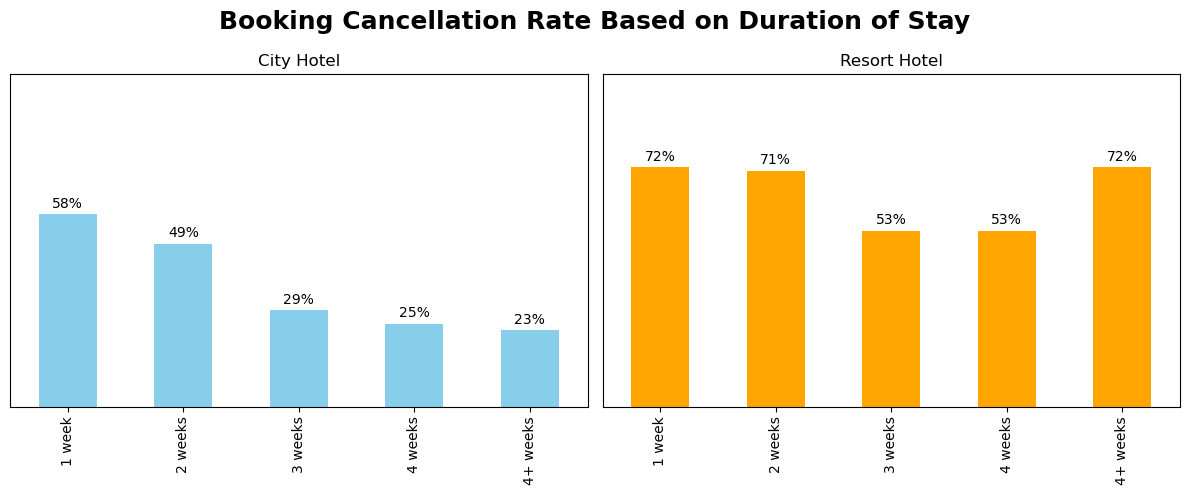

In [54]:
# create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# plot for 'City Hotel'
ax = pv_total_nights.xs('City Hotel', level=0)['Cancelation PCT'].plot.bar(
    ax=axs[0], ylim=(0, 100), color='skyblue')
ax.set_xlabel("")
ax.set_title('City Hotel')

# remove borders and y-axis ticks
ax.set_yticks([])
ax.yaxis.set_tick_params(labelleft=False)

# add value labels with "%"
for i, v in enumerate(pv_total_nights.xs('City Hotel', level=0)['Cancelation PCT']):
    ax.text(i, v + 1, f'{v:.0f}%', ha='center', va='bottom')

# plot for 'Resort Hotel'
ax = pv_total_nights.xs('Resort Hotel', level=0)['Cancelation PCT'].plot.bar(
    ax=axs[1], ylim=(0, 100), color='orange')
ax.set_xlabel("")
ax.set_title('Resort Hotel')

# remove borders and y-axis ticks
ax.set_yticks([])
ax.yaxis.set_tick_params(labelleft=False)

# add value labels with "%"
for i, v in enumerate(pv_total_nights.xs('Resort Hotel', level=0)['Cancelation PCT']):
    ax.text(i, v + 1, f'{v:.0f}%', ha='center', va='bottom')

plt.suptitle('Booking Cancellation Rate Based on Duration of Stay', 
             fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

**Insight:**

Pada City Hotel, terdapat kecenderungan bahwa cancelation rate menurun seiring dengan peningkatan durasi menginap. Di sisi lain, pada Resort Hotel, cancelation rate mengalami penurunan hingga durasi menginap mencapai 4 minggu. Namun, setelah melewati durasi tersebut, terjadi peningkatan tajam dalam cancelation rate, mencapai 72% saat durasi menginap lebih dari 4 minggu. Hal ini menunjukkan pola yang berbeda dari City Hotel, di mana penurunan cancelation rate tidak berlanjut setelah durasi menginap tertentu. 

Untuk meningkatkan retensi tamu, City Hotel dapat mempertimbangkan untuk menawarkan lebih banyak paket atau promosi yang berfokus pada pengalaman menginap yang lebih lama, seperti diskon untuk menginap lebih dari satu minggu atau paket all-inclusive untuk menginap bulanan. Untuk mengurangi tingkat cancelation di Resort Hotel, manajemen dapat meninjau kebijakan pembatalan dan menawarkan insentif khusus bagi tamu yang memesan menginap untuk periode yang lebih lama. Selain itu, memperluas jangka waktu pembatalan yang lebih panjang untuk tamu yang memesan jauh-jauh hari juga dapat membantu mengurangi cancelation rate.